In [3]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
from sklearn.linear_model import LinearRegression
from statistics import mean
from tqdm import tqdm_notebook

In [4]:
def generateAngleMaximum(angleNumber, beamWidth):
    lowerBound = -beamWidth / 2
    upperBond = beamWidth / 2
    angles = np.random.uniform(lowerBound, upperBond, angleNumber)
    return angles


def angularValue(angleArray):
    sumOfCos = 0
    index = 1
    for i in angleArray:
        for j in angleArray[index:]:
            sumOfCos += np.cos(np.deg2rad(i - j))
        index += 1
    return sumOfCos


def generateChannelCoefficient(pathNumber, pathCoefficient, angles):
    channelCoefficient = np.square(pathCoefficient) * (
        pathNumber + (2 * angularValue(angles)))
    return channelCoefficient

In [8]:
beamWidth = 5
pathCoefficient = 1
pathNumber = 200
channelCoefficientList = []

In [9]:
print('Starting iterations!\nPath number: {}\nIteration: {}\nBeam width: {}'.
      format(pathNumber, 1, beamWidth))

for path in tqdm_notebook(np.arange(1, pathNumber + 1)):
    angles = generateAngleMaximum(path, beamWidth)
    channelCoefficientList.append(generateChannelCoefficient(
        path, pathCoefficient, angles))


Starting iterations!
Path number: 200
Iteration: 1
Beam width: 5


In [10]:
channelCoefficientList

[1,
 3.999974547013199,
 8.996377187492751,
 15.99329443636832,
 24.986796945912314,
 35.977390271101996,
 48.97673600952461,
 63.949116483322605,
 80.95707000960691,
 99.93016764739534,
 120.91733187958216,
 143.88848400258533,
 168.91385430843636,
 195.89378881306095,
 224.87479179029611,
 255.9016604760741,
 288.8458244109009,
 323.7928762742518,
 360.8213690003815,
 399.7551052752647,
 440.758810887241,
 483.77967700237645,
 528.6981033965427,
 575.6953822457399,
 624.5496918885619,
 675.6186137919372,
 728.7483586252924,
 783.3782418325011,
 840.4748604950236,
 899.4976992669789,
 960.275784624586,
 1023.4589104237975,
 1088.390034881204,
 1155.6014792255678,
 1224.2315401227097,
 1295.3816620904665,
 1368.150170177612,
 1443.0535771746656,
 1519.9586940989648,
 1599.0908023694287,
 1679.9187514297942,
 1762.9492186999032,
 1847.8100652123467,
 1934.5731410459666,
 2023.6080224667126,
 2114.6477472016472,
 2207.6590031838814,
 2302.4376068438182,
 2399.4054822713288,
 2498.3171401

In [19]:
np.savetxt('../ml/dataset/5.csv', channelCoefficientList)

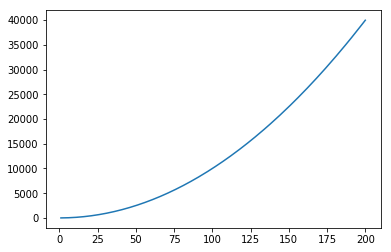

In [12]:
plt.plot(range(1, pathNumber+1), channelCoefficientList)